In [22]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('DataSets//cardio_train.csv')
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [3]:
# df = pd.read_csv('DataSets//cardio_train.csv', delimiter=';') same
df = pd.read_csv('DataSets//cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.isnull().values.any()

np.False_

In [6]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

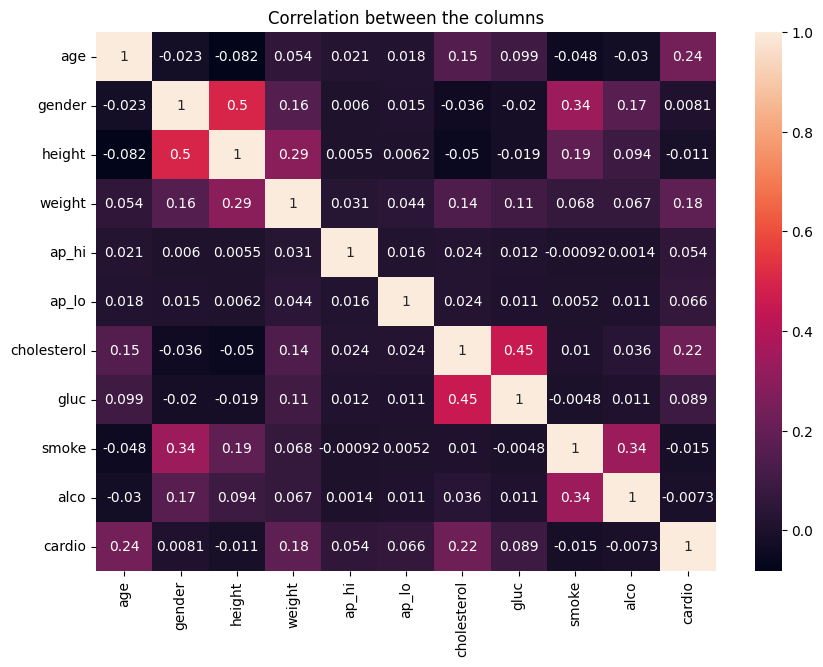

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.drop(['id', 'active'], axis=1).corr(), annot=True)
# sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [8]:
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [9]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (70000, 11)
Shape of y is:  (70000,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree

In [11]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
DT_pred = DT_model.predict(X_test)
DT_pred

array([1, 1, 1, ..., 0, 1, 1])

In [13]:
DT_model.score(X_test,y_test)

0.6360476190476191

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100)

In [15]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
RF_pred = RF_model.predict(X_test)
RF_pred

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
RF_model.score(X_test,y_test)

0.7171428571428572

## SVM

In [18]:
from sklearn.svm import SVC
SVM_model = SVC()

In [19]:
SVM_model.fit(X_train, y_train)

SVC()

In [20]:
SVM_pred = SVM_model.predict(X_test)
SVM_pred

array([1, 1, 1, ..., 0, 1, 0])

In [21]:
SVM_model.score(X_test,y_test)

0.6047619047619047